In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = pd.read_csv("/Users/anastasia/Downloads/saas_sales_operations_data.csv")
customer_df = pd.read_csv("/Users/anastasia/Downloads/saas_customer_interactions.csv")

In [99]:
sales_df.info()
print(sales_df.describe())
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            300 non-null    object 
 1   Customer_Segment       300 non-null    object 
 2   Region                 300 non-null    object 
 3   Subscription_Plan      300 non-null    object 
 4   Monthly_Revenue        300 non-null    float64
 5   Monthly_Profit         300 non-null    float64
 6   Customer_Satisfaction  237 non-null    float64
 7   Active_Users           291 non-null    float64
 8   Engagement_Level       300 non-null    object 
 9   Account_Manager        300 non-null    object 
 10  Renewal_Status         300 non-null    object 
 11  Signup_Date            300 non-null    object 
dtypes: float64(4), object(8)
memory usage: 28.3+ KB
       Monthly_Revenue  Monthly_Profit  Customer_Satisfaction  Active_Users
count       300.000000      300.000000

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager,Renewal_Status,Signup_Date
0,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05
1,CUST0002,SMB,South America,Enterprise,2811.46,1953.30,3.0,45.0,High,Manager D,Churned,2021-04-27
2,CUST0003,SMB,Africa,Enterprise,3517.35,3235.63,5.0,200.0,Medium,Manager D,Churned,2021-07-18
3,CUST0004,Enterprise,North America,Enterprise,718.77,2998.91,1.0,176.0,High,Manager B,Renewed,2021-09-21
4,CUST0005,Mid-Market,North America,Pro,4355.46,1387.93,3.0,119.0,Medium,Manager C,Churned,2021-08-14


In [101]:
customer_df.info()
print(customer_df.describe())
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          150 non-null    object 
 1   Interaction_Type     150 non-null    object 
 2   Interaction_Date     150 non-null    object 
 3   Issue_Resolved       150 non-null    object 
 4   Followup_CSAT_Score  118 non-null    float64
 5   Account_Manager      150 non-null    object 
dtypes: float64(1), object(5)
memory usage: 7.2+ KB
       Followup_CSAT_Score
count           118.000000
mean              3.067797
std               1.460177
min               1.000000
25%               2.000000
50%               3.000000
75%               4.000000
max               5.000000


,Customer_ID,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager
0,CUST0203,Product Demo,2023-06-24,No,NaN,Manager C
1,CUST0255,Support Call,2023-02-03,No,3.0,Manager A
2,CUST0016,QBR,2023-07-18,No,4.0,Manager B
3,CUST0196,QBR,2023-07-18,Yes,NaN,Manager D
4,CUST0219,Support Call,2023-06-28,No,1.0,Manager C


In [103]:
region_plan_sales_df = sales_df.groupby(["Region", "Subscription_Plan"])[["Monthly_Revenue", "Monthly_Profit"]].mean()
display(region_plan_sales_df)

Monthly_Revenue  Monthly_Profit
Region        Subscription_Plan                                 
Africa        Basic                  3253.175333     1694.072667
              Enterprise             2757.055455     1943.407727
              Pro                    2816.129200     1972.988800
Asia          Basic                  2721.695000     1469.423125
              Enterprise             3032.213478     1907.233478
              Pro                    2594.924500     2209.147500
Europe        Basic                  2659.536316     2221.831053
              Enterprise             3185.767895     2167.945789
              Pro                    2626.151250     1788.224167
North America Basic                  2366.193684     1770.608421
              Enterprise             2316.685333     1863.736000
              Pro                    2474.382857     2526.929643
South America Basic                  2967.022632     1666.435263
              Enterprise             3254.035000     1744.073333
              Pro                    2080.892778     2361.787222

In [126]:
region_plan_cs_df = sales_df.groupby(["Region", "Subscription_Plan"])["Customer_Satisfaction"].mean()
display(region_plan_cs_df)

Region         Subscription_Plan
Africa         Basic                2.636364
               Enterprise           2.571429
               Pro                  3.250000
Asia           Basic                3.083333
               Enterprise           3.047619
               Pro                  3.266667
Europe         Basic                2.941176
               Enterprise           2.600000
               Pro                  2.777778
North America  Basic                3.176471
               Enterprise           2.333333
               Pro                  3.090909
South America  Basic                3.615385
               Enterprise           3.375000
               Pro                  3.642857
Name: Customer_Satisfaction, dtype: float64

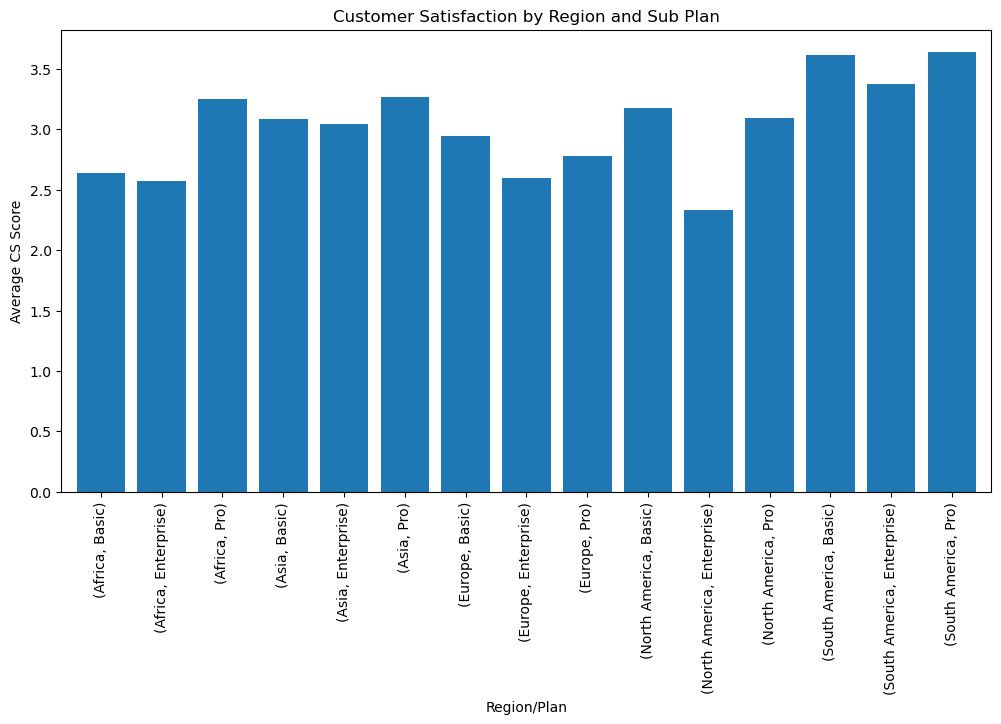

In [128]:
region_plan_cs_df.plot(kind="bar", figsize=(12,6), width=0.8)
plt.title("Customer Satisfaction by Region and Sub Plan")
plt.ylabel("Average CS Score")
plt.xlabel("Region/Plan")
plt.show()
# messy, cluttered - next use seaborn to better map

In [130]:
region_plan_cs_df.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=region_plan_cs_df, x="Region", y="Customer_Satisfaction", hue="Subscription_Plan")
plt.xlabel("Region")
plt.ylabel("Average Customer Satisfaction Score")
plt.title("Avg CS by Region/Plan")
plt.legend(title="Subscription Plan", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
# bbox to anchor moves the legend out of the graph borders - very useful
# barplot is storming awesome

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>

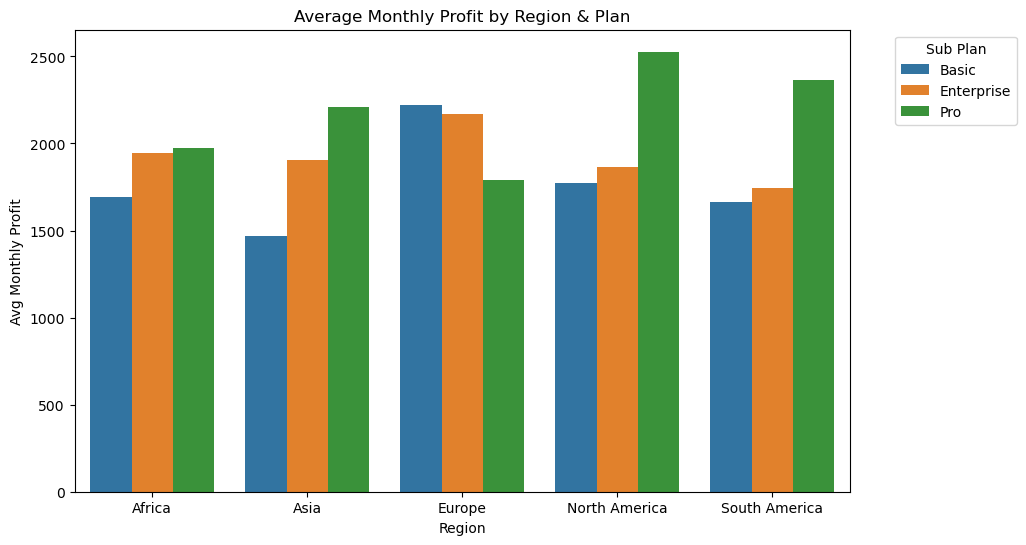

In [124]:
region_plan_sales_df = region_plan_sales_df.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=region_plan_sales_df, x="Region", y="Monthly_Profit", hue="Subscription_Plan")
plt.legend(title="Sub Plan", bbox_to_anchor=(1.05,1), loc="upper left")
plt.title("Average Monthly Profit by Region & Plan")
plt.ylabel("Avg Monthly Profit")
plt.xlabel("Region")
plt.show()

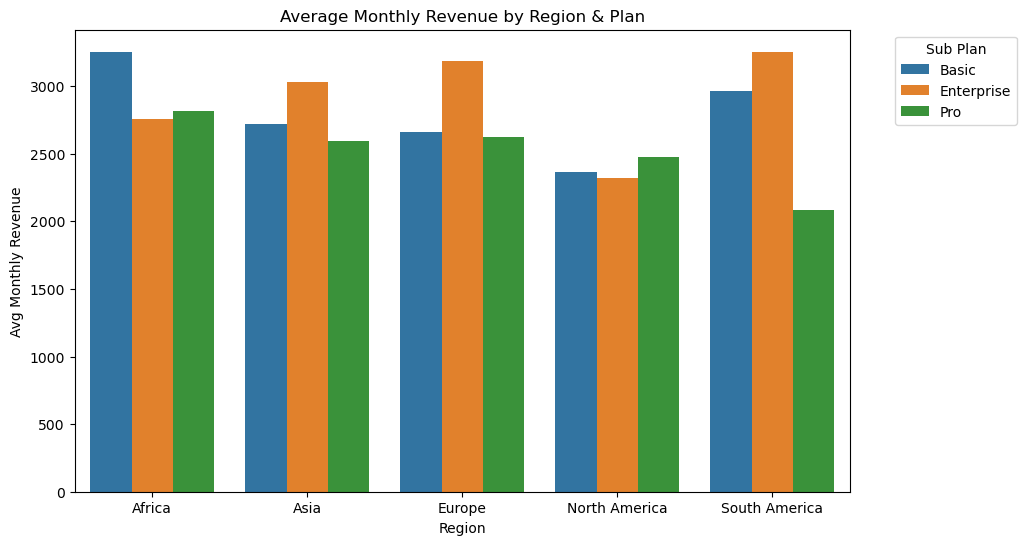

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(data=region_plan_sales_df, x="Region", y="Monthly_Revenue", hue="Subscription_Plan")
plt.legend(title="Sub Plan", bbox_to_anchor=(1.05,1), loc="upper left")
plt.title("Average Monthly Revenue by Region & Plan")
plt.ylabel("Avg Monthly Revenue")
plt.xlabel("Region")
plt.show()

In [134]:
segment_rev_prof_df = sales_df.groupby("Customer_Segment")[["Monthly_Revenue", "Monthly_Profit"]].mean()
segment_cs_df = sales_df.groupby("Customer_Segment")["Customer_Satisfaction"].mean()
display(segment_rev_prof_df)
display(segment_cs_df)

,Monthly_Revenue,Monthly_Profit
Customer_Segment,,
Enterprise,2816.049612,2069.621845
Mid-Market,2653.011512,1967.936744
SMB,2723.529009,1899.817928


Customer_Segment
Enterprise    2.975904
Mid-Market    2.957143
SMB           3.178571
Name: Customer_Satisfaction, dtype: float64

In [136]:
unique_df = sales_df.drop_duplicates(subset="Customer_ID", keep="last")
churned_df = unique_df[unique_df["Renewal_Status"]=="Churned"]
renewed_df = unique_df[unique_df["Renewal_Status"]=="Renewed"]
churned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            163 non-null    object 
 1   Customer_Segment       163 non-null    object 
 2   Region                 163 non-null    object 
 3   Subscription_Plan      163 non-null    object 
 4   Monthly_Revenue        163 non-null    float64
 5   Monthly_Profit         163 non-null    float64
 6   Customer_Satisfaction  128 non-null    float64
 7   Active_Users           158 non-null    float64
 8   Engagement_Level       163 non-null    object 
 9   Account_Manager        163 non-null    object 
 10  Renewal_Status         163 non-null    object 
 11  Signup_Date            163 non-null    object 
dtypes: float64(4), object(8)
memory usage: 16.6+ KB
